<a href="https://colab.research.google.com/github/gsfreitas/data-science/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

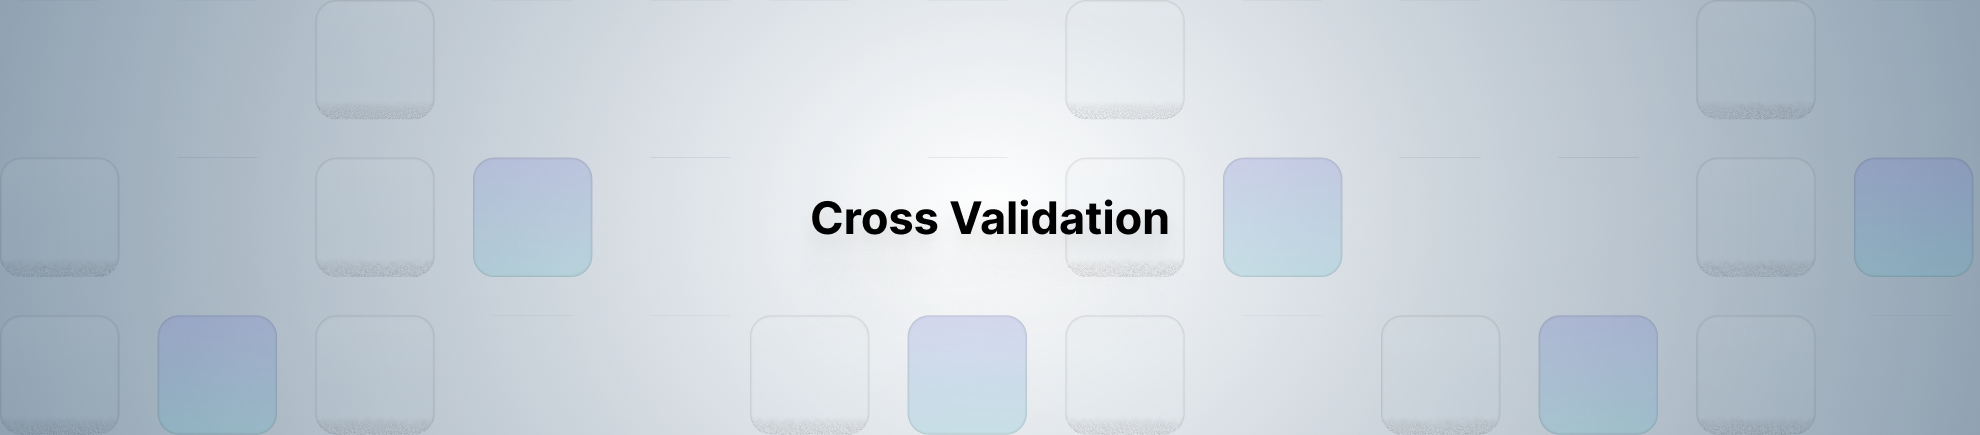

# Bibliotecas

In [ ]:
# importando as bibliotecas
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Leitura e tratamento dos dados

In [ ]:
# lendo os dados
data = pd.read_csv('/content/drive/MyDrive/data-science-project/cross-validation/houses_to_rent_v2.csv',
                   encoding='latin1', decimal=',', sep=',')

# limpando as colunas que nao sao necessarias
data_clean = data.drop(columns=['city', 'animal', 'furniture', 'hoa (R$)', 'property tax (R$)', 'rent amount (R$)', 'fire insurance (R$)'])

In [ ]:
data_clean.head()

,area,rooms,bathroom,parking spaces,floor,total (R$)
0,70,2,1,1,7,5618
1,320,4,4,0,20,7973
2,80,1,1,1,6,3841
3,51,2,1,0,2,1421
4,25,1,1,0,1,836


In [ ]:
data_clean.value_counts()

area   rooms  bathroom  parking spaces  floor  total (R$)
47     1      1         1               1      2633          22
20     1      1         0               -      2555          14
45     1      1         1               1      8590           9
35     1      1         0               1      1572           7
40     1      1         0               -      809            7
                                                             ..
70     2      1         0               6      2303           1
                                               3097           1
                                        8      1652           1
                                        9      1776           1
46335  4      8         5               11     10220          1
Length: 10318, dtype: int64

In [ ]:
# substituindo o - por zero
data_clean.replace({'-':0}, inplace=True)

In [ ]:
# verificando se ha algum valor nulo
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   area            10692 non-null  int64 
 1   rooms           10692 non-null  int64 
 2   bathroom        10692 non-null  int64 
 3   parking spaces  10692 non-null  int64 
 4   floor           10692 non-null  object
 5   total (R$)      10692 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 501.3+ KB


# Regressão Linear

In [ ]:
# selecionando as caracteristicas
features = [index for index in data_clean.columns if index != 'total (R$)']
features

['area', 'rooms', 'bathroom', 'parking spaces', 'floor']

In [ ]:
# selecionando as variaveis explicativas
X = data_clean[features].values
Y = data_clean['total (R$)'].values

In [ ]:
# dividindo os dados de treino (75%) e teste (25%)
predict_train, predict_test, class_train, class_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
# instancia a regressao linear
regressor = LinearRegression()

# treina o modelo
regressor.fit(predict_train, class_train)

print(f"Acesso ao termo de interceptação: {regressor.intercept_}")
print(f"Acesso ao coeficiente: {regressor.coef_}")

Acesso ao termo de interceptação: 500.8359289357322
Acesso ao coeficiente: [ 8.75233555e-02 -7.65644958e+02  2.94791859e+03 -1.42351051e+00
  7.52515323e+01]


In [ ]:
# testando nos dados de teste
predictions = regressor.predict(predict_test)
predictions

array([ 2835.25242986,  2072.78144979, 10454.10457924, ...,
        2069.84690542,  2706.74086423,  4108.04792471])

In [ ]:
# medindo o R² do modelo
r2 = r2_score(class_test, predictions)
r2

0.4424900736228453

In [ ]:
# calculando a media da classe e previsoes
print(f"Média previsões: {predictions.mean()}")
print(f"Média classes: {class_test.mean()}")

Média previsões: 5525.278866266763
Média classes: 5214.610549943884


# Cross Validation

In [ ]:
# definindo uma semente da aleatoriedade
seed = 1234567

# definindo os K-Folds
kf = KFold(n_splits=2, random_state=seed, shuffle=True)
kf

KFold(n_splits=2, random_state=1234567, shuffle=True)

In [ ]:
# cross validation
scores = cross_val_score(regressor, X, Y, cv=kf, scoring='r2')
print(scores)
print(f"Média R²: {scores.mean()}")

[0.29267113 0.02300018]
Média R²: 0.1578356536027372


# Seleção de características

Aqui vamos testar de forma manual o desempenho do modelo selecionando as características. Contudo, poderíamos fazer isso através da estratégia PCA (Principal Component Analysis) ou até mesmo SVD (Singular Value Decomposition), que possui um custo computacional menor. Vamos deixar para abordar sobre essas duas estratégias posteriormente.

In [ ]:
# vamos remover a variavel floor
features = [index for index in data_clean.columns if (index != 'total (R$)') & (index != 'floor')]
features

['area', 'rooms', 'bathroom', 'parking spaces']

In [ ]:
# definindo as variaveis
X = data_clean[features]

In [ ]:
# cross validation
scores = cross_val_score(regressor, X, Y, cv=kf, scoring='r2')
print(scores)
print(f"Média R²: {scores.mean()}")

[0.27662947 0.02334498]
Média R²: 0.1499872254029193


Podemos perceber que ao remover uma das características, obtivemos um resultado menor em comparação ao modelo com todas as características.

# Seleção do melhor modelo

In [ ]:
# definindo as caracteristicas
features = [index for index in data_clean.columns if index != 'total (R$)']
X = data_clean[features]

In [ ]:
scores = cross_val_score(LassoLars(), X, Y, cv=kf, scoring='r2')
print(scores)
print(f"Média R²: {scores.mean()}")

[0.29310247 0.02300103]
Média R²: 0.15805174936842875


R² Regressão Linear: 0.1578356536027372

R² Least Angle Regression: 0.15805174936842875

# Model tuning

Vamos obter os parâmetros do modelo que obteve melhor desempenho.

In [ ]:
# carregando um novo conjunto de dados de especies de flores
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
# semente da aleatoriedade
seed = 10000

# divide os folds
kf = KFold(n_splits=2, random_state=seed, shuffle=True)
kf

KFold(n_splits=2, random_state=10000, shuffle=True)

In [ ]:
# instancia o modelo dos K vizinhos mais proximos (neste caso 3)
knn = KNeighborsClassifier(n_neighbors=3)

# calcula a pontuacao
scores = cross_val_score(knn, x, y, cv=kf, scoring='accuracy')
scores

array([0.94666667, 0.93333333])

In [ ]:
# definindo o range de vezes a ser testado
k_range = range(1, 20)

# cria uma lista para armazenar os resultados
k_scores = []

# inicia a iteracao
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.9666666666666667, 0.9333333333333333, 0.94, 0.94, 0.9466666666666667, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.94, 0.94, 0.9199999999999999, 0.9133333333333333, 0.9, 0.9066666666666666, 0.9133333333333333, 0.9066666666666666, 0.8999999999999999, 0.8933333333333333, 0.8933333333333333]


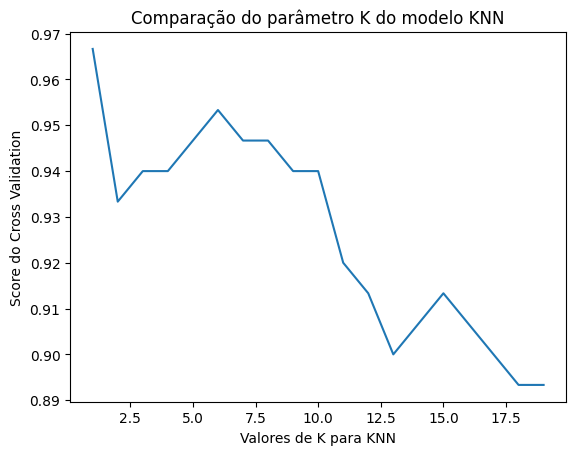

In [ ]:
# plot de um grafico para interpretar melhor o resultado
plt.plot(k_range, k_scores)
plt.title("Comparação do parâmetro K do modelo KNN")
plt.xlabel('Valores de K para KNN')
plt.ylabel('Score do Cross Validation');

Podemos perceber que a melhor acurácia correponde a um valor de K entre 5 e 7.